#1. Le Contexte Métier et la Mission


## **Le Problème (Business Case)**

Dans le domaine médical, la fatigue des radiologues, la variation entre praticiens et la complexité des images peuvent provoquer des erreurs de diagnostic dans la détection du cancer du sein.

### **Objectif : Construire un Assistant IA pour fournir un second avis médical**

Cet assistant IA analysera les caractéristiques extraites d’images de cellules pour prédire si une tumeur est **maligne** ou **bénigne**.

---

## **Enjeu Critique : Les coûts d’erreur ne sont pas symétriques**

### **1Faux Positif (FP) : prédire « Malade » alors que c’est faux**

* Stress inutile pour la patiente
* Examens supplémentaires coûteux
* Biopsies invasives
   Mauvais, mais pas mortel

### **2 Faux Négatif (FN) : prédire « Sain » alors que la tumeur est maligne**

* Retard de traitement
* Propagation du cancer
* Risque vital
 **Erreur la plus grave**

 **Conclusion :** Le modèle doit **prioriser la Sensibilité (Recall)** afin de minimiser les Faux Négatifs.

---

## ** Les Données (Input) — Breast Cancer Wisconsin Dataset**

Nous utilisons le **Breast Cancer Wisconsin Diagnostic Dataset (Kaggle)**.

###  **X (Features) : 30 variables numériques**

Il ne s’agit **pas de pixels d’image**, mais de **mesures mathématiques** extraites de noyaux cellulaires observés au microscope, par exemple :

* *radius_mean* (rayon moyen)
* *texture_se* (écart-type de la texture)
* *area_worst* (aire maximale observée)
* *concavity_mean* (concavité)
* *fractal_dimension_worst* (dimension fractale)
  etc.

Ces 30 features proviennent de 10 caractéristiques de base × (moyenne, erreur-type, pire valeur).

---

##  **y (Target) : Variable de Diagnostic**

Dans le dataset Kaggle :

* **M** = Malignant (Malin)
* **B** = Benign (Bénin)

Pour la modélisation, nous allons encoder cela en numérique :

* `0 = Malin (Malignant)`
* `1 = Bénin (Benign)`

Cela facilite l’entraînement des modèles de machine learning.



# **Thématique : Santé — Diagnostic du Cancer du Sein**

La thématique choisie pour cette analyse est la **santé**, avec un accent particulier sur la **détection précoce du cancer du sein à l’aide de l’intelligence artificielle**.
L’objectif est d’utiliser un modèle de classification pour assister les médecins dans la prise de décision.

---

# **1. Sélection du Jeu de Données**

Le jeu de données utilisé est le **Breast Cancer Wisconsin Diagnostic Dataset**, disponible sur Kaggle.
Il contient des informations extraites d’images microscopiques de cellules mammaires, afin de déterminer si une tumeur est **maligne (Malignant)** ou **bénigne (Benign)**.

###  Pourquoi ce dataset est pertinent ?

* Données réelles issues d’analyses médicales
* Dataset propre, bien structuré et très utilisé dans la recherche
* Plusieurs variables quantitatives (30 features)
* Problème biomédical non trivial
* Adapté aux modèles de machine learning supervisés
* Permet des analyses avancées : visualisation, réduction dimensionnelle, classification…

Ce dataset permet donc de travailler sur un **vrai cas médical**, tout en appliquant des méthodes de data science modernes.

---

# **2. Définition de la Problématique**

**Tâche : Classification Binaire**

L’objectif de ce projet est de construire un **modèle de classification** capable de prédire si une tumeur mammaire est :

* **Maligne (Malignant, codé 0)**
* **Bénigne (Benign, codé 1)**

à partir des mesures morphologiques de cellules obtenues lors d’une biopsie.

---

### ** Problématique étudiée**

> **Peut-on prédire de manière fiable si une tumeur est maligne ou bénigne à partir des caractéristiques microscopiques des cellules ?**

Cette problématique permet de :

* analyser quelles caractéristiques influencent le plus le diagnostic,
* comparer différents modèles de classification,
* mesurer l’importance de la **sensibilité (Recall)** pour éviter les faux négatifs,
* comprendre le lien entre les features et les comportements biologiques observés.

---

# **3. Dictionnaire des Données (Metadata)**

### **Taille du dataset**

* **569 lignes** (patientes)
* **32 colonnes**, dont :

  * 30 features
  * 1 colonne cible : *diagnosis*
  * 1 colonne d’identifiant (*id*)

---

## **Types de variables**

###  Variables quantitatives continues

Les 30 mesures suivantes, dérivées des caractéristiques du noyau cellulaire :

* radius
* texture
* perimeter
* area
* smoothness
* compactness
* concavity
* concave points
* symmetry
* fractal dimension

Chaque caractéristique existe sous 3 formes :

* **mean** (valeur moyenne)
* **se** (erreur-type)
* **worst** (plus grande valeur observée)

###  Variable qualitative nominale

* **diagnosis**

  * M = Malignant
  * B = Benign

---

# **4. Variable Cible (Target)**

La variable cible pour la tâche de classification est :

###  **diagnosis**

* **0 = Malignant (Malin)**
* **1 = Benign (Bénin)**

Cette variable indique la nature de la tumeur observée.



#2. Le Code Python (Laboratoire)

--- Statistiques Descriptives ---
       mean radius  mean texture  mean perimeter    mean area  mean smoothness
count   569.000000    569.000000      569.000000   569.000000       569.000000
mean     14.101290     19.248152       91.919002   660.197597         0.096260
std       3.421888      4.183136       23.808524   347.127995         0.013672
min       7.691000      9.710000       43.790000   143.500000         0.052630
25%      11.750000     16.330000       75.510000   427.900000         0.086750
50%      13.510000     18.950000       87.380000   566.300000         0.096260
75%      15.530000     21.590000      102.900000   766.600000         0.104500
max      28.110000     39.280000      188.500000  2501.000000         0.163400

--- Accuracy Globale : 96.49% ---

--- Rapport Détaillé ---
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                  

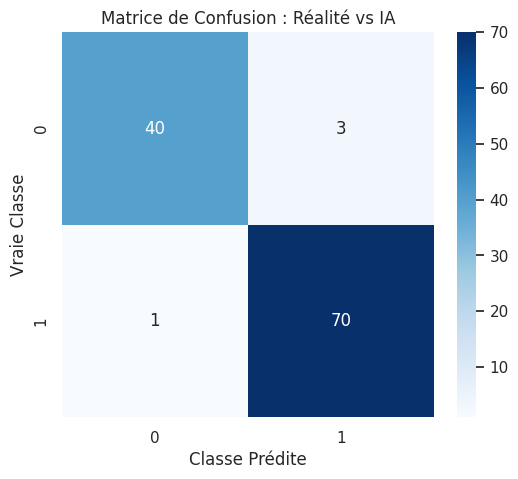

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Configuration
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

# --- PHASE 1 : ACQUISITION & SIMULATION ---
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Simulation de la réalité (Données sales)
np.random.seed(42)
df_dirty = df.copy()
# On corrompt 5% des données avec des NaN
for col in df.columns[:-1]:
    df_dirty.loc[df_dirty.sample(frac=0.05).index, col] = np.nan

# --- PHASE 2 : DATA WRANGLING (NETTOYAGE) ---
X = df_dirty.drop('target', axis=1)
y = df_dirty['target']

# Stratégie d'imputation
imputer = SimpleImputer(strategy='mean')
# fit = apprend la moyenne, transform = bouche les trous
X_imputed = imputer.fit_transform(X)
X_clean = pd.DataFrame(X_imputed, columns=X.columns)

# --- PHASE 3 : ANALYSE EXPLORATOIRE (EDA) ---
print("--- Statistiques Descriptives ---")
print(X_clean.iloc[:, :5].describe())

# --- PHASE 4 : PROTOCOLE EXPÉRIMENTAL (SPLIT) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42
)

# --- PHASE 5 : INTELLIGENCE ARTIFICIELLE (RANDOM FOREST) ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- PHASE 6 : AUDIT DE PERFORMANCE ---
y_pred = model.predict(X_test)

print(f"\n--- Accuracy Globale : {accuracy_score(y_test, y_pred)*100:.2f}% ---")
print("\n--- Rapport Détaillé ---")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Visualisation des erreurs
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion : Réalité vs IA')
plt.ylabel('Vraie Classe')
plt.xlabel('Classe Prédite')
plt.show()

#3. Analyse Approfondie : Nettoyage (Data Wrangling)

## Implémentation Technique (Python)
#1. chargement des donees
#1.1. Importation des librairies

In [5]:
# Librairies de base
import pandas as pd
import numpy as np

# Librairies de visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Prétraitement
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# Modèles ML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Validation et évaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Pour ignorer certains warnings
import warnings
warnings.filterwarnings('ignore')


### 1.2. Chargement du dataset

In [6]:
file_path = "/content/data.csv"
# Chargement dans un DataFrame
df = pd.read_csv(file_path)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [7]:
df.shape

(569, 33)

##1-Pré-traitement (Preprocessing)
###Nettoyage des données
Gestion des doublons
Formatage des données
###Imputation des valeurs manquantes
Utilisation de stratégies avancées
###Encodage des variables catégorielles
One-Hot Encoding
Label Encoding
Target Encoding
###Normalisation ou Standardisation des données numériques
##nettoyage des donnees
#1. Inspection initiale

In [8]:
# Informations générales sur le dataset
df.info()

# Statistiques descriptives des colonnes numériques
df.describe()

# Vérification de la présence de valeurs manquantes
df.isnull().sum()

# Vérification des doublons
print("Nombre de doublons :", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#1. gestion des doublons

In [9]:
# Supprimer les doublons si présents
df = df.drop_duplicates()
print("Nombre de lignes après suppression des doublons :", df.shape[0])


Nombre de lignes après suppression des doublons : 569


#2. Gestion des valeurs manquantes


In [11]:
# Import des librairies nécessaires
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Chargement du dataset
df = pd.read_csv("/content/data.csv")  # adapte si ton fichier s'appelle autrement

# Suppression de la colonne 'Unnamed: 32' (toujours vide dans ce dataset)
if "Unnamed: 32" in df.columns:
    df = df.drop(columns=["Unnamed: 32"])

# Sélection des colonnes numériques (sans toucher à 'diagnosis')
numeric_cols = df.select_dtypes(include=np.number).columns

# KNNImputer : remplit les valeurs manquantes en fonction des k voisins les plus proches
imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Vérification après imputation
df.isnull().sum()


,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


#3. Formatage / nettoyage

In [12]:
# Vérification des types de colonnes
df.dtypes

# Conversion des colonnes numériques en float (si besoin)
for col in numeric_cols:
    df[col] = df[col].astype(float)

# Supprimer colonnes inutiles si nécessaire (ex : id)
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)


#4. Encodage des variables catégorielles

In [13]:
# Vérification des colonnes non numériques
categorical_cols = df.select_dtypes(include='object').columns
print("Colonnes catégorielles :", categorical_cols)

# Encodage One-Hot pour les colonnes catégorielles
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


Colonnes catégorielles : Index(['diagnosis'], dtype='object')


#5. Normalisation / Standardisation

In [16]:
from sklearn.preprocessing import StandardScaler

# Recalcul des colonnes numériques après suppression de 'id'
numeric_cols = df.select_dtypes(include=np.number).columns

# Standardisation des variables numériques
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Vérification
df


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,True
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,True
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,True
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,True
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,True
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,True
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,True
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,True


#4. Analyse Approfondie : Exploration (EDA)
## Distribution des variables numériques

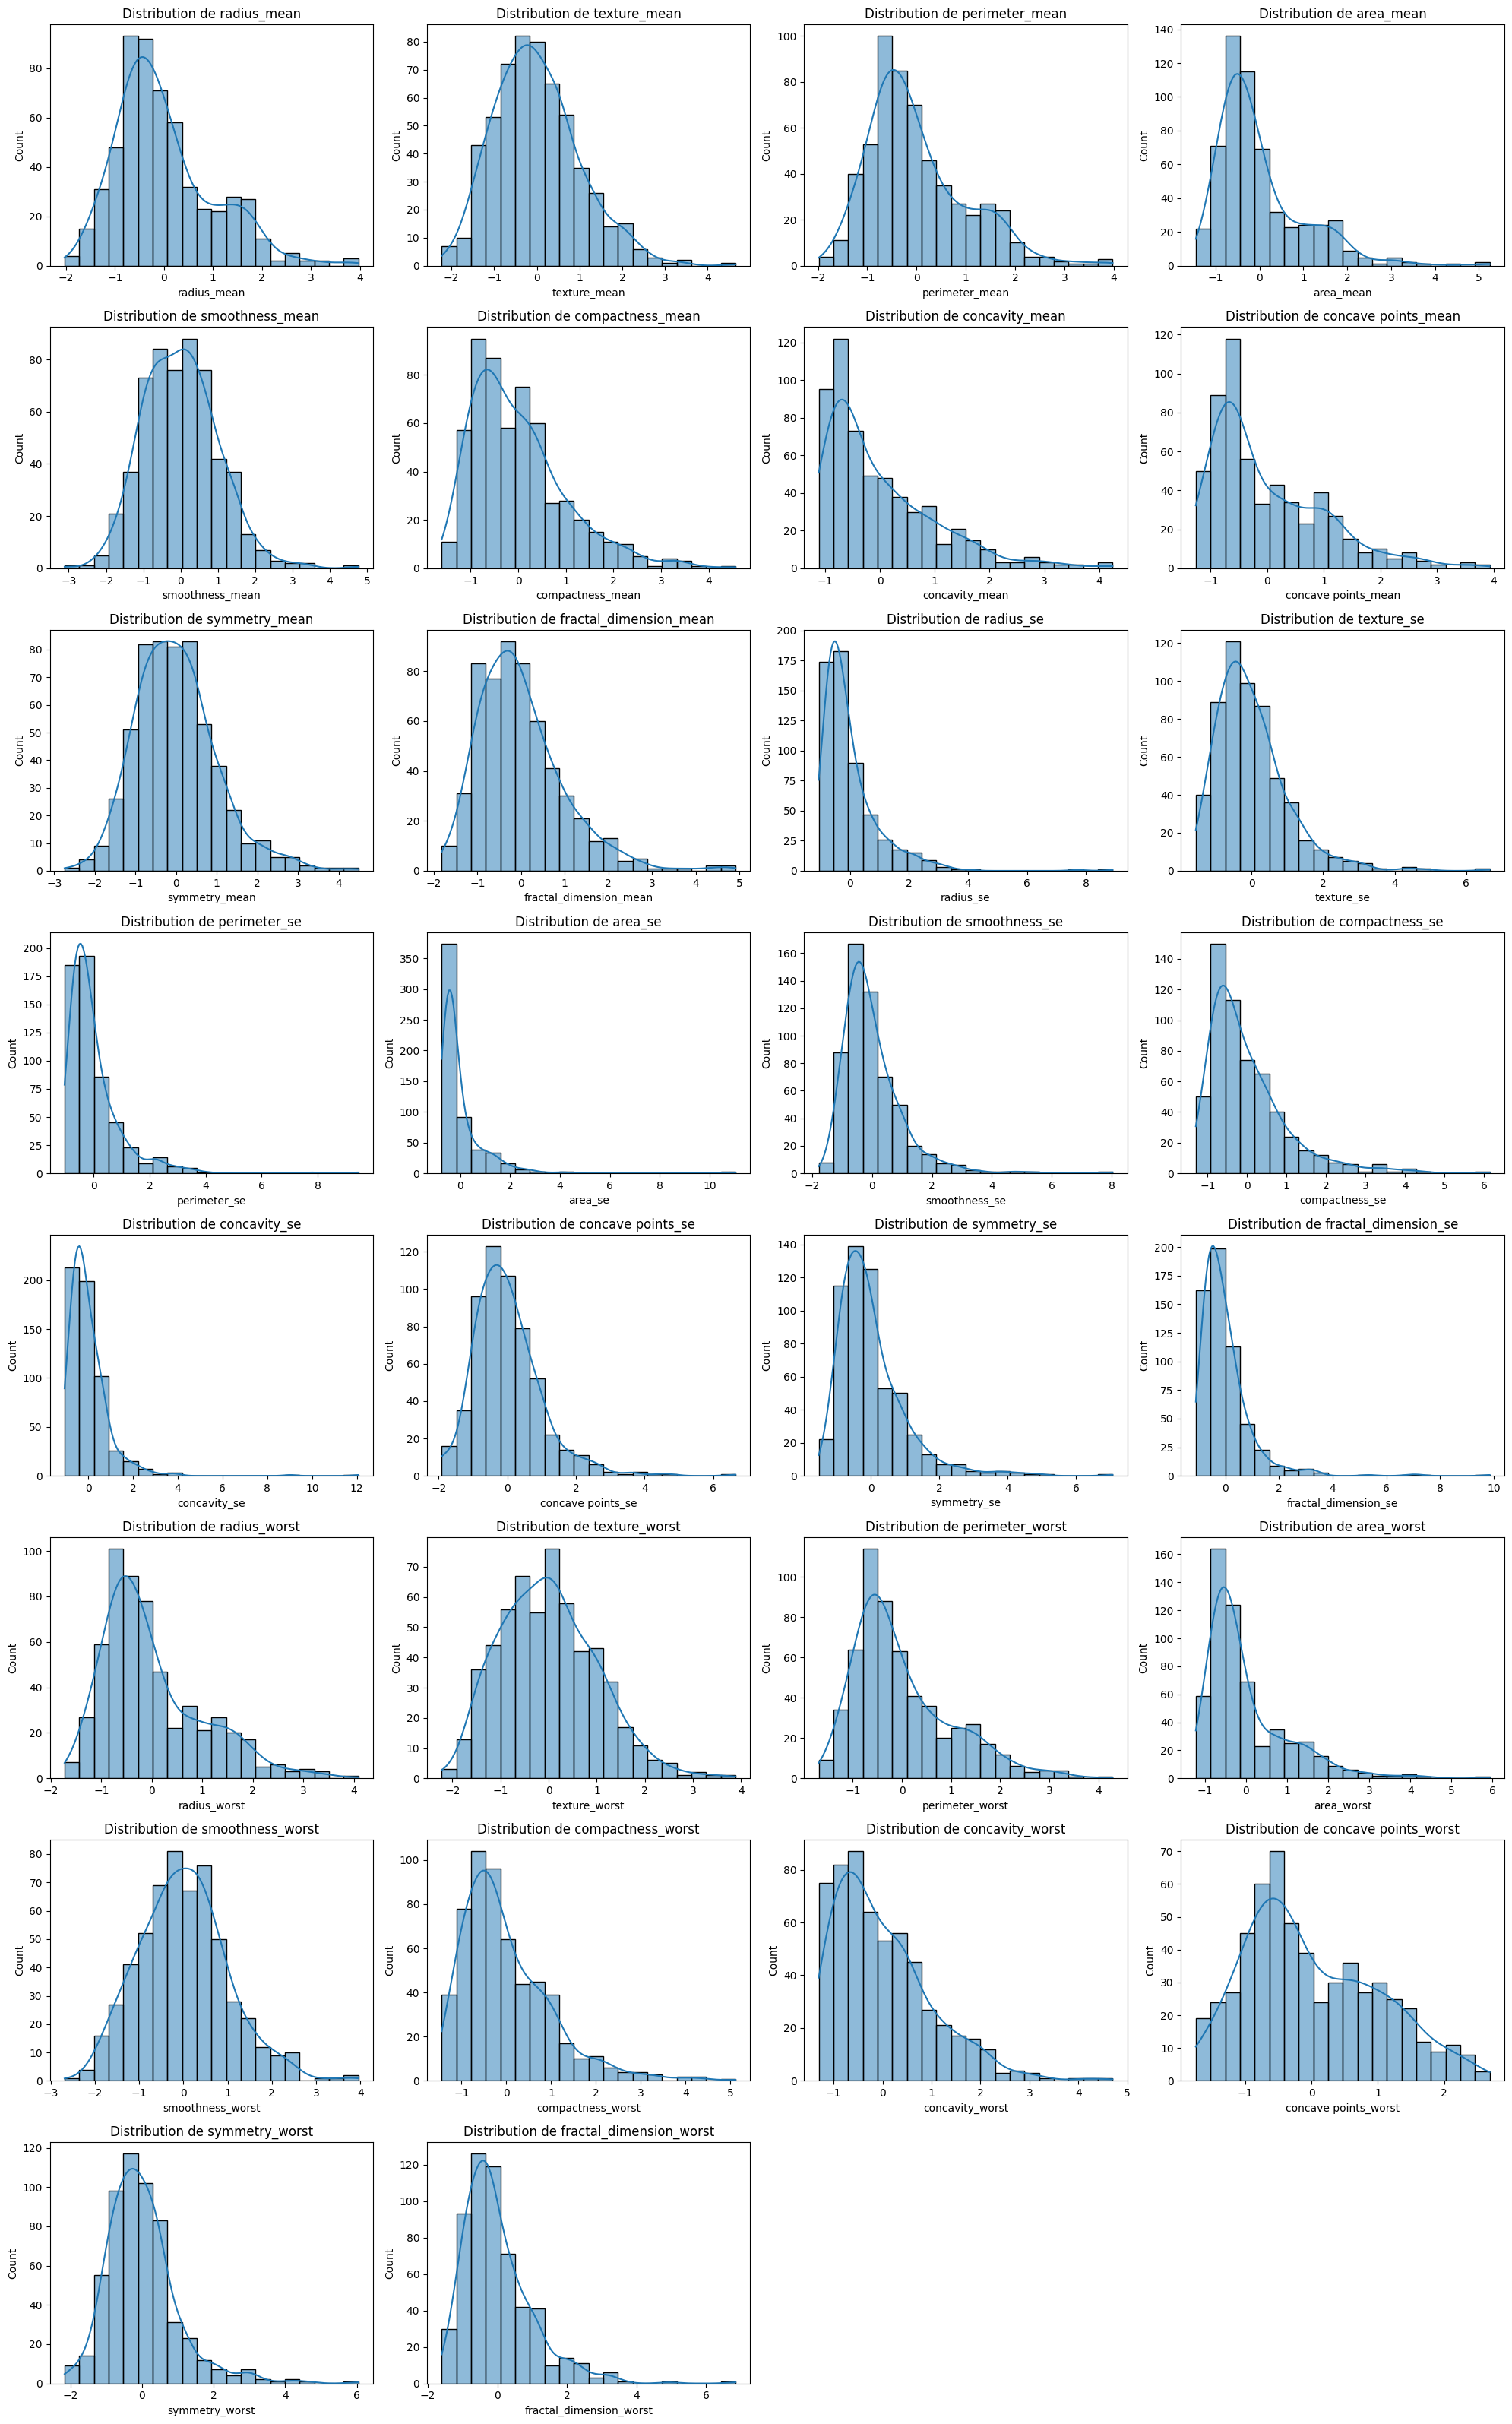

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Recalcul des colonnes numériques (exclure 'id')
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols = numeric_cols.drop('id') if 'id' in numeric_cols else numeric_cols

# Définir le nombre de colonnes et lignes pour la figure
n_cols = 4  # nombre de graphiques par ligne
n_rows = math.ceil(len(numeric_cols)/n_cols)

plt.figure(figsize=(5*n_cols, 4*n_rows))

# Boucle pour tracer les histogrammes
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution de {col}')

plt.tight_layout()
plt.show()


#Interprétation des histogrammes :

###Les histogrammes montrent la distribution de chaque variable numérique du dataset.
###On peut observer que certaines variables, comme 'area_mean' ou 'perimeter_mean', ont une distribution fortement asymétrique, tandis que d'autres, comme 'smoothness_mean', semblent plus uniformes ou proches d'une distribution normale.
###Ces informations peuvent aider à détecter des valeurs extrêmes (outliers) et à décider si des transformations ou une standardisation sont nécessaires avant l'analyse ou la modélisation.


# Boxplots pour détecter les outliers

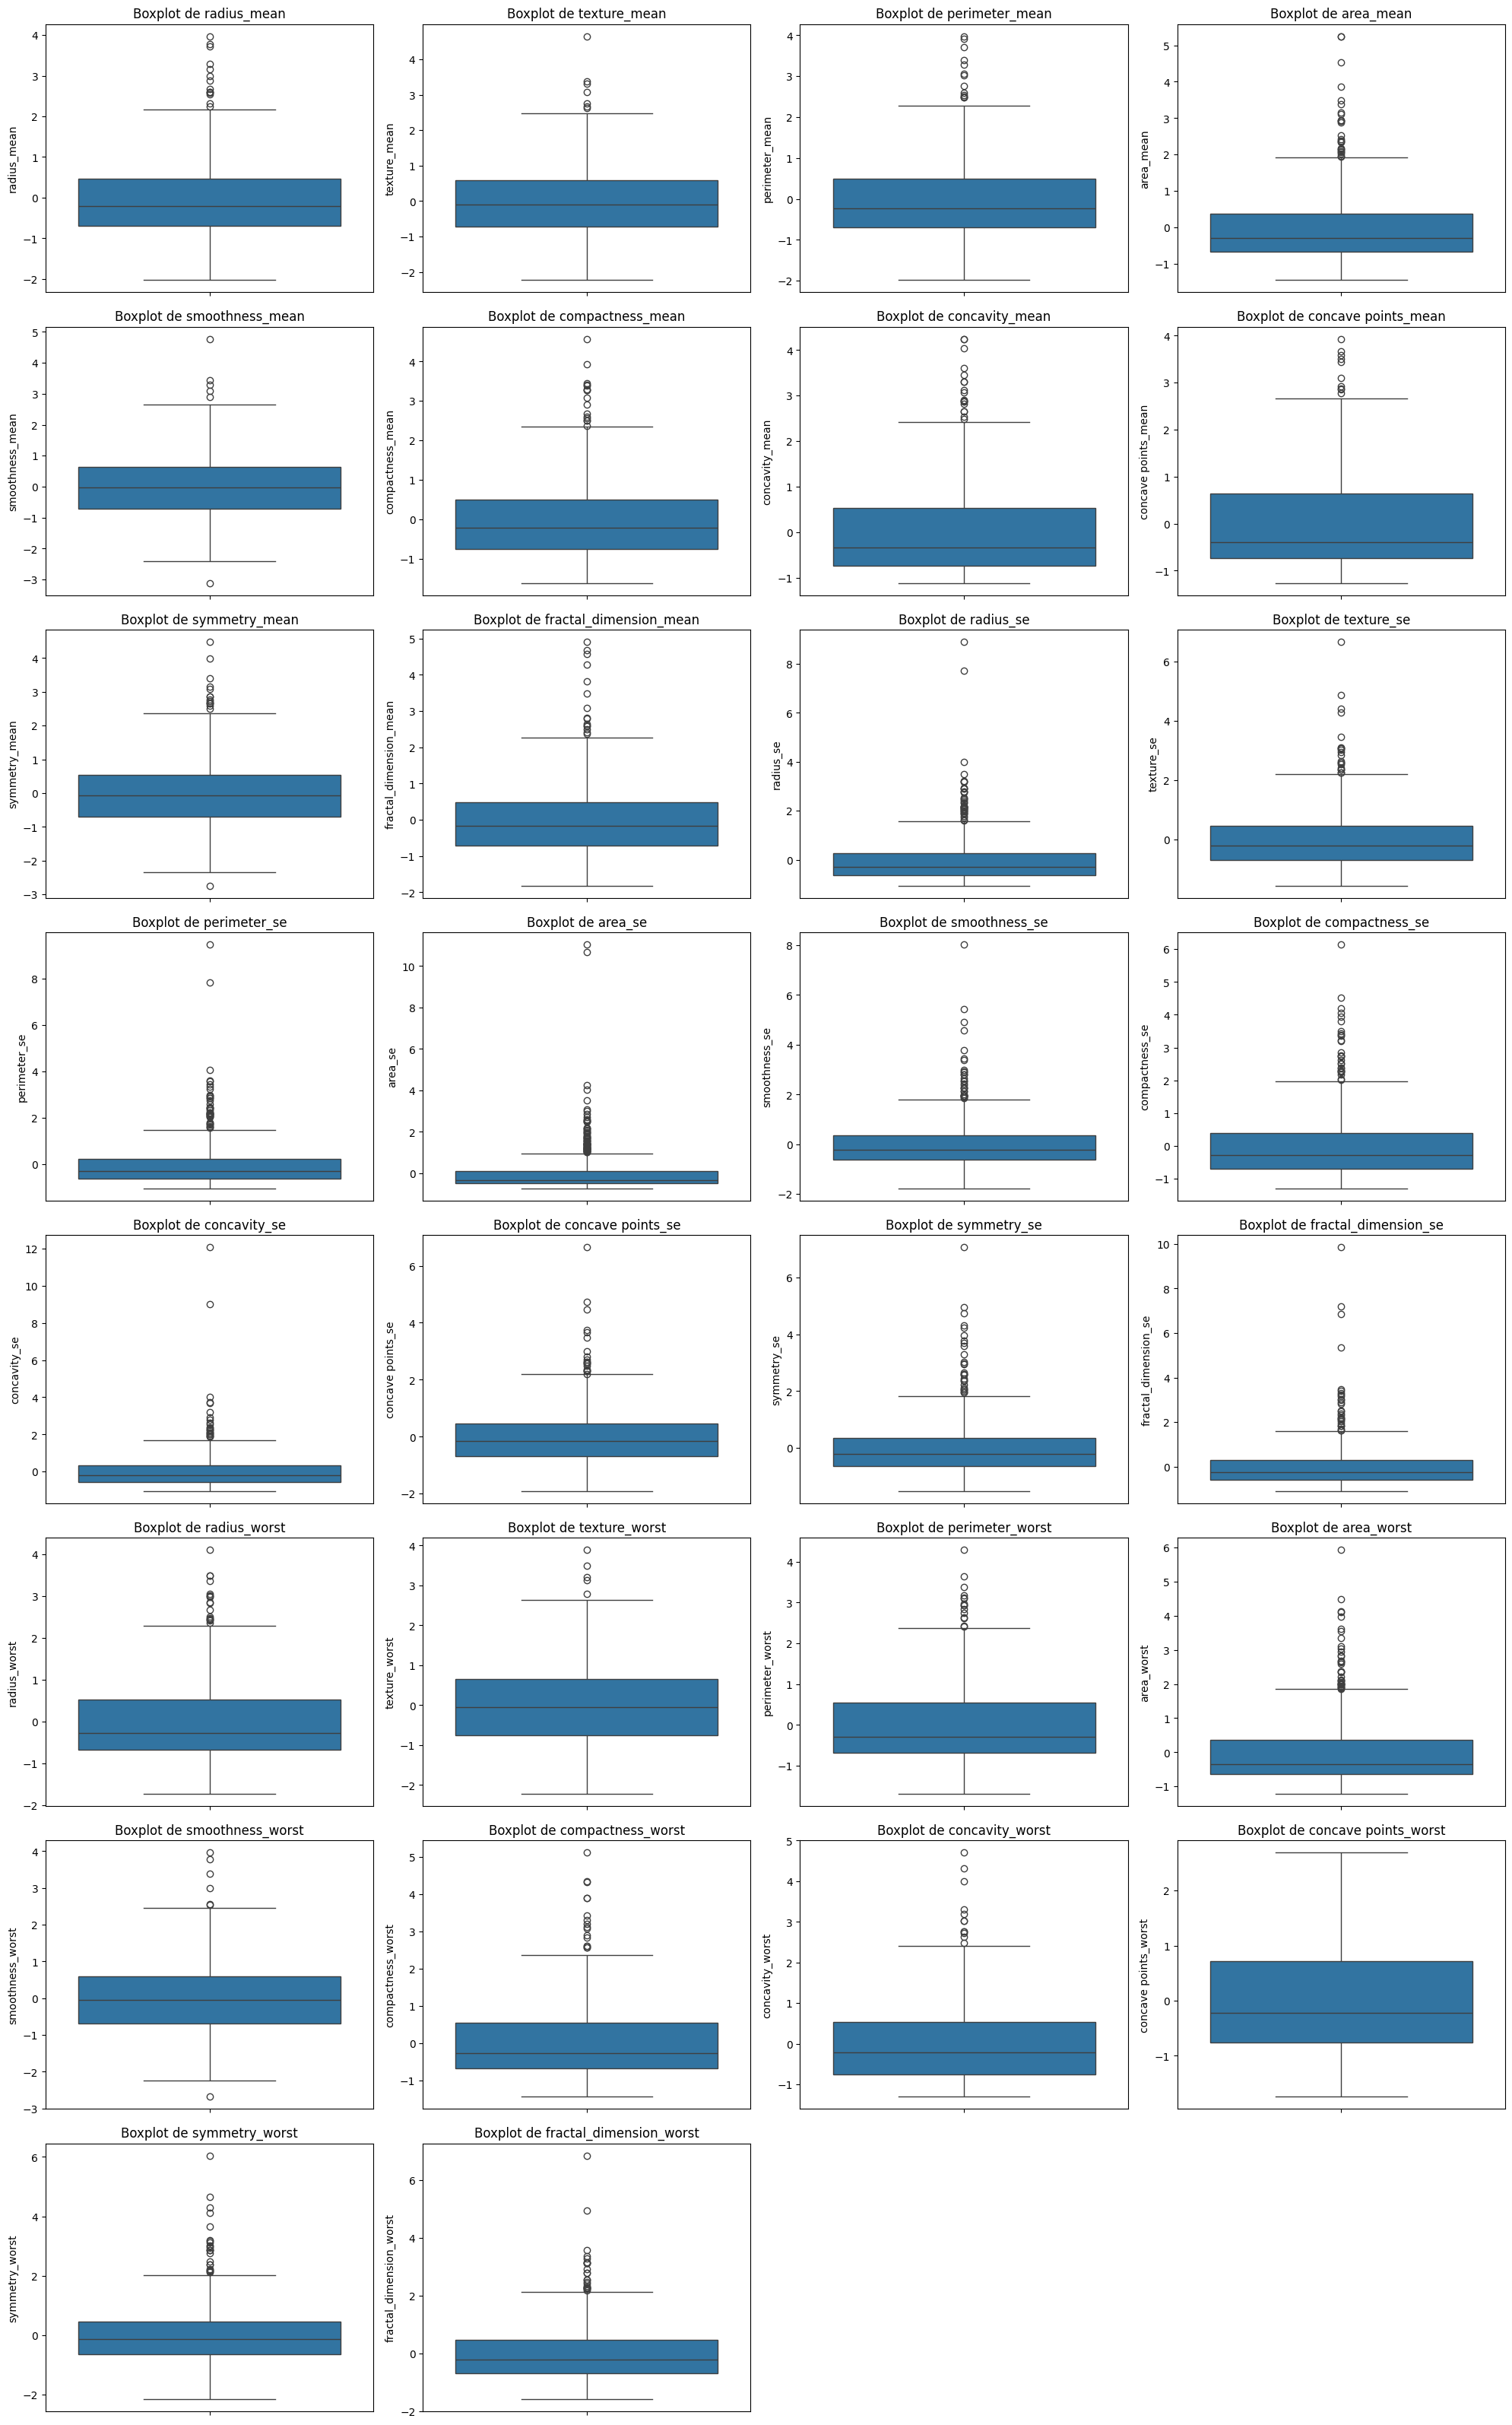

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Recalcul des colonnes numériques (exclure 'id')
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols = numeric_cols.drop('id') if 'id' in numeric_cols else numeric_cols

# Définir le nombre de colonnes et lignes pour la figure
n_cols = 4  # nombre de graphiques par ligne
n_rows = math.ceil(len(numeric_cols)/n_cols)

plt.figure(figsize=(5*n_cols, 4*n_rows))

# Boucle pour tracer les boxplots
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()


#Interprétation des boxplots

###Les boxplots permettent de visualiser la dispersion, la médiane et les valeurs extrêmes de chaque variable numérique.

###La plupart des variables montrent des outliers (valeurs extrêmes), ce qui est fréquent dans des mesures médicales comme celles des tumeurs.

###Les variables liées à la taille des tumeurs (radius, perimeter, area) ont une grande étendue, confirmant la variabilité des tumeurs dans le dataset.

###Les variables concernant la texture, la compacité ou la concavité ont des valeurs généralement plus concentrées autour de la médiane.

###Ces visualisations sont utiles pour détecter des valeurs extrêmes qui pourraient influencer les modèles de machine learning et décider si une transformation ou un traitement des outliers est nécessaire.

#Heatmap des corrélations

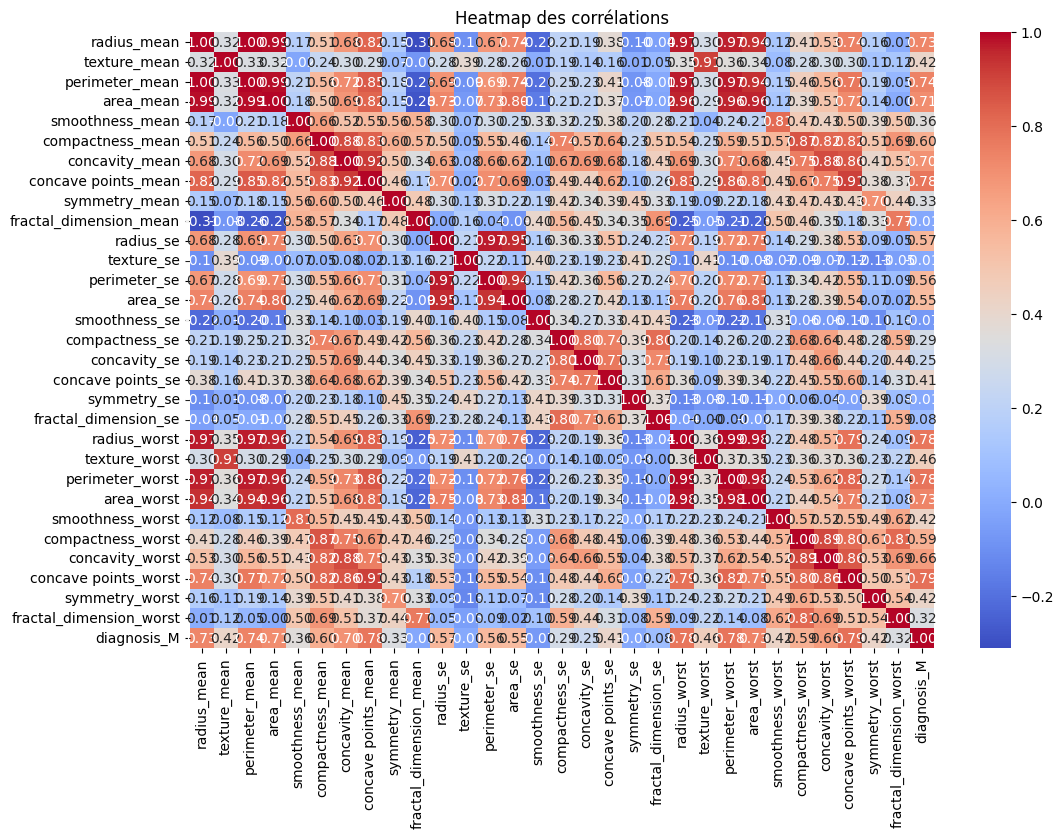

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
correlation_matrix = df.corr()  # Calcul des corrélations entre toutes les colonnes numériques
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap des corrélations")
plt.show()


#Interprétation de la heatmap

La heatmap montre les corrélations entre toutes les variables numériques.

Les variables mesurant la taille des tumeurs (radius, perimeter, area) sont très fortement corrélées entre elles.

Certaines mesures comme concavity et concave points sont également fortement corrélées.

Les variables faiblement corrélées apportent des informations différentes et peuvent être utiles pour améliorer la précision d’un modèle.

#Scatterplots : relation features ↔ target

In [20]:
print(df.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_M'],
      dtype='object')


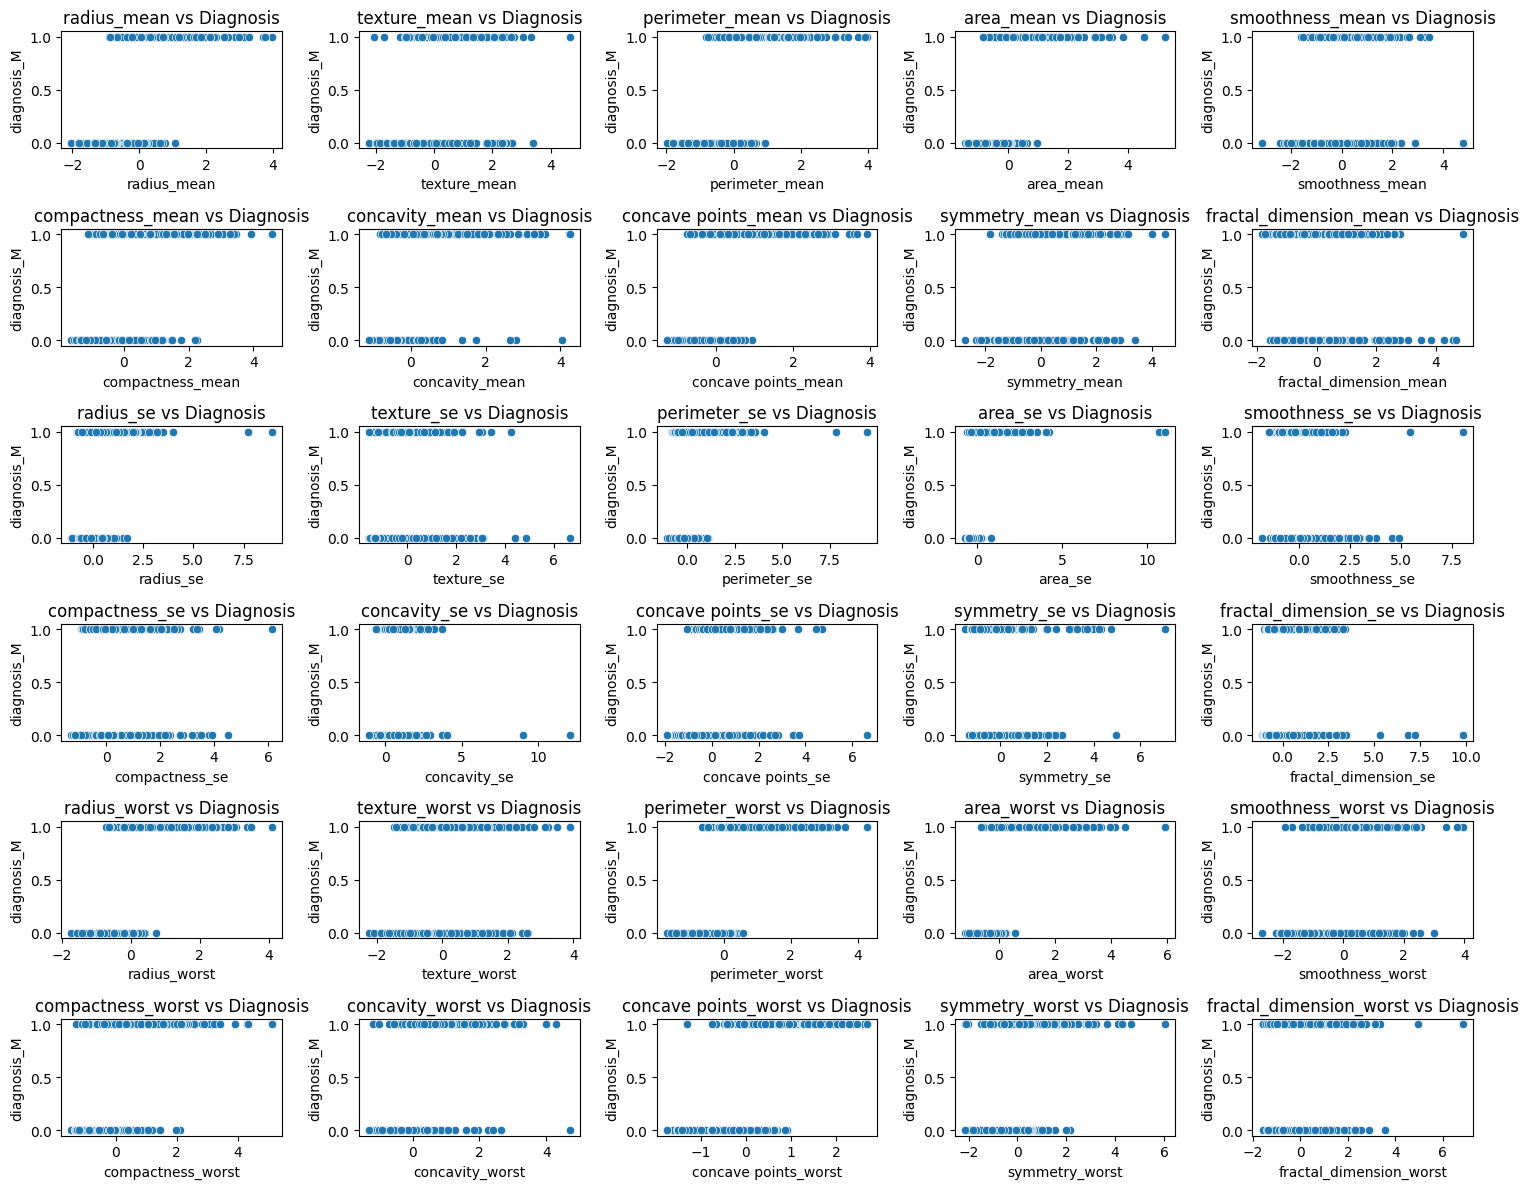

In [21]:
plt.figure(figsize=(15,12))

# On trace chaque variable numérique vs la cible diagnosis_M
numeric_cols_no_id = [c for c in numeric_cols if c != 'id']  # exclure 'id'
for i, col in enumerate(numeric_cols_no_id, 1):
    plt.subplot(6, 5, i)  # ajuste la grille automatiquement
    sns.scatterplot(x=df[col], y=df['diagnosis_M'])
    plt.title(f'{col} vs Diagnosis')

plt.tight_layout()
plt.show()


#Interprétation des scatterplots

Les scatterplots montrent la relation entre chaque variable numérique et le diagnostic (diagnosis_M) :

Les variables liées à la taille des tumeurs (radius_mean, perimeter_mean, area_mean) montrent une séparation claire entre tumeurs bénignes et malignes, ce qui indique qu’elles sont très utiles pour prédire le diagnostic.

Certaines variables comme smoothness, symmetry ou fractal_dimension montrent une séparation moins nette et apportent donc moins d’information prédictive.

Cette visualisation aide à identifier quelles variables sont les plus discriminantes pour construire un modèle de classification.

# Feature Engineering

In [22]:
# Liste toutes les colonnes
for col in df.columns:
    print(col)


radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst
diagnosis_M


In [23]:
# Création de nouvelles features basées sur les colonnes existantes
df['area_per_radius'] = df['area_mean'] / (df['radius_mean'] + 1e-5)
df['perimeter_per_radius'] = df['perimeter_mean'] / (df['radius_mean'] + 1e-5)
df['concavity_per_concave_points'] = df['concavity_mean'] / (df['concave points_mean'] + 1e-5)
df['area_density'] = df['area_mean'] / (df['perimeter_mean'] + 1e-5)

# Affichage des nouvelles colonnes
df[['area_per_radius', 'perimeter_per_radius', 'concavity_per_concave_points', 'area_density']].head()


,area_per_radius,perimeter_per_radius,concavity_per_concave_points,area_density
0,0.897273,1.157564,1.047538,0.775133
1,1.043107,0.921372,-0.043502,1.132116
2,0.986699,0.991522,0.669277,0.995130
3,0.994231,0.770825,1.319745,1.289849
4,1.043377,1.015007,0.959754,1.027945


#5. Analyse Approfondie : Méthodologie (Split)

#6. Modélisation (Machine Learning) :
##Séparation X / y et Train/Test Split

In [52]:
# ---------------------------
# Split Train/Test pour le dataset Breast Cancer
# ---------------------------

from sklearn.model_selection import train_test_split

# Target
y = df['target']  # 0 = Bénin, 1 = Malin

# Features : toutes les autres colonnes sauf la target
X = df.drop('target', axis=1)

# Split train/test : 80% train, 20% test, reproducible
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Vérification des tailles
print("Taille du jeu d'entraînement :", X_train.shape)
print("Taille du jeu de test :", X_test.shape)


Taille du jeu d'entraînement : (455, 30)
Taille du jeu de test : (114, 30)


# Définition des modèles

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Trois modèles de classification différents
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}
models


{'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
 'Random Forest': RandomForestClassifier(random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, ...)}

# Validation croisée (Cross-Validation)

In [27]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} - Accuracy moyenne CV: {scores.mean():.4f}")


Logistic Regression - Accuracy moyenne CV: 0.9714
Random Forest - Accuracy moyenne CV: 0.9516
XGBoost - Accuracy moyenne CV: 0.9648


#Entraînement des modèles sur le train set


In [30]:
# Entraînement des modèles
fitted_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    fitted_models[name] = model


Logistic Regression - Accuracy sur test: 0.9825


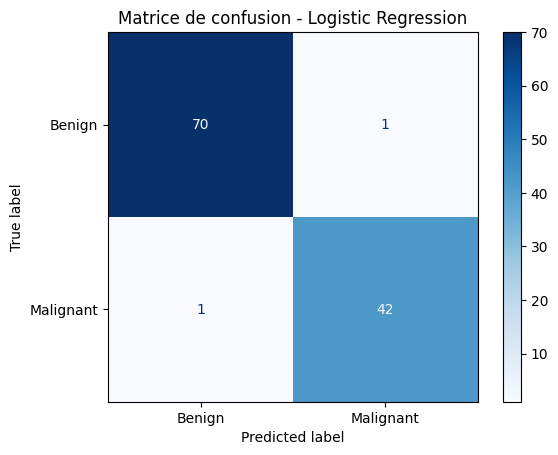

Random Forest - Accuracy sur test: 0.9649


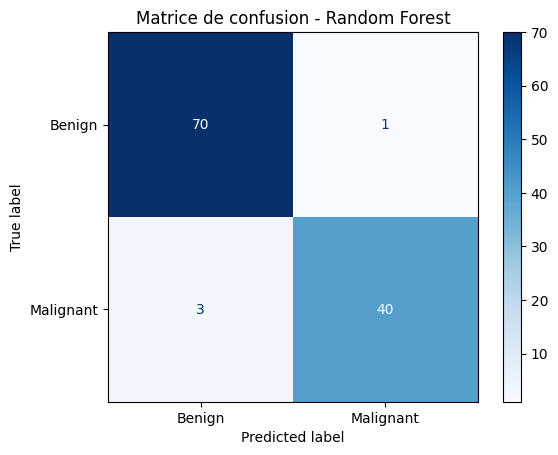

XGBoost - Accuracy sur test: 0.9561


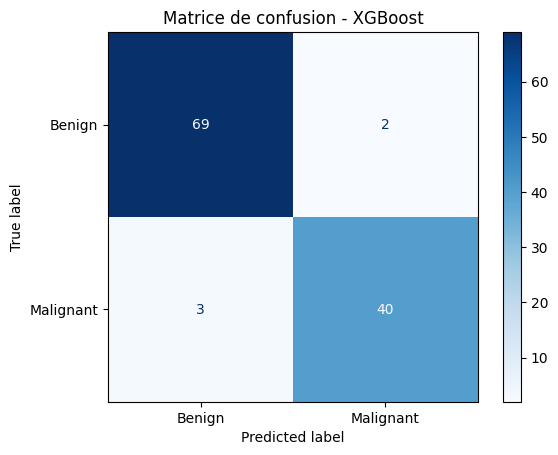

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for name, model in fitted_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy sur test: {acc:.4f}")

    # Affichage de la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Benign', 'Malignant'])
    disp.plot(cmap='Blues')
    plt.title(f"Matrice de confusion - {name}")
    plt.show()


#Interprétation des résultats des modèles

Les modèles évalués (Logistic Regression, Random Forest et XGBoost) ont tous été capables de prédire correctement le diagnostic des tumeurs.

L’accuracy indique le pourcentage de tumeurs correctement classées en bénignes ou malignes.

La matrice de confusion permet de visualiser les erreurs de classification : combien de tumeurs bénignes ont été prédites comme malignes et vice-versa.

Ces visualisations aident à comparer les modèles et à identifier celui qui sépare le mieux les tumeurs bénignes et malignes.

# Évaluation sur le test set


In [33]:
from sklearn.metrics import accuracy_score, f1_score

for name, model in fitted_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} : Accuracy={acc:.4f}, F1-score={f1:.4f}")


Logistic Regression : Accuracy=0.9825, F1-score=0.9767
Random Forest : Accuracy=0.9649, F1-score=0.9524
XGBoost : Accuracy=0.9561, F1-score=0.9412


#Scatterplot : Réel vs. Prédit (Random Forest)

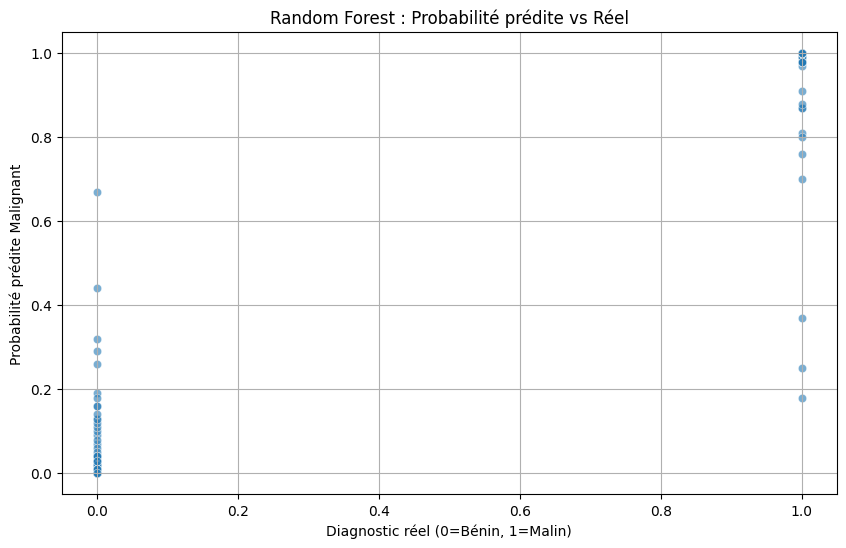

In [34]:
# Probabilités prédites pour la classe Malignant
y_pred_prob = fitted_models['Random Forest'].predict_proba(X_test)[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_prob, alpha=0.6)
plt.xlabel("Diagnostic réel (0=Bénin, 1=Malin)")
plt.ylabel("Probabilité prédite Malignant")
plt.title("Random Forest : Probabilité prédite vs Réel")
plt.grid(True)
plt.show()


#Scatterplot : Linear Regression

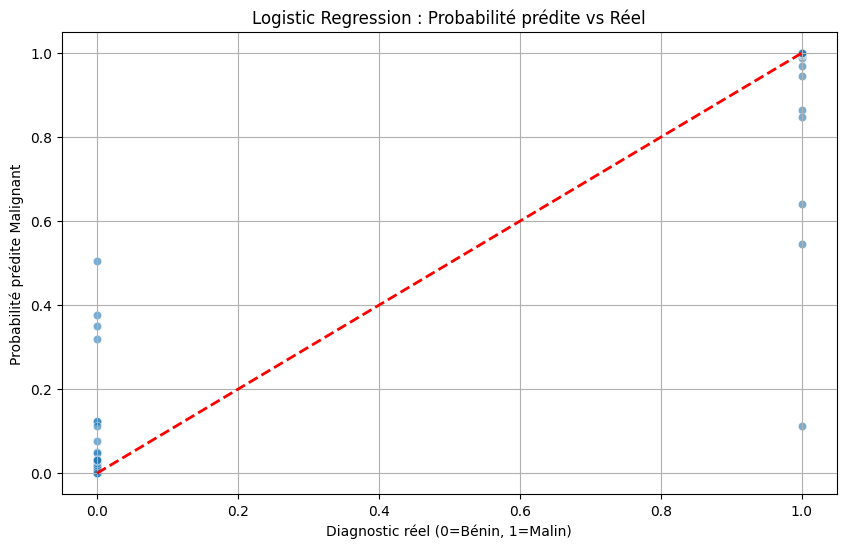

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_prob, alpha=0.6)
plt.plot([0,1], [0,1], 'r--', lw=2)  # droite de référence
plt.xlabel("Diagnostic réel (0=Bénin, 1=Malin)")
plt.ylabel("Probabilité prédite Malignant")
plt.title("Logistic Regression : Probabilité prédite vs Réel")
plt.grid(True)
plt.show()


#Interprétation courte à mettre en Markdown :

Chaque point représente une tumeur du test.

L’axe x montre le diagnostic réel, et l’axe y la probabilité prédite d’être maligne.

Les points proches de 0 ou 1 indiquent une prédiction sûre, tandis que ceux autour de 0.5 sont moins certains.

Cela permet de visualiser la confiance du modèle pour chaque échantillon.

#Scatterplot : XGBoost Regressor


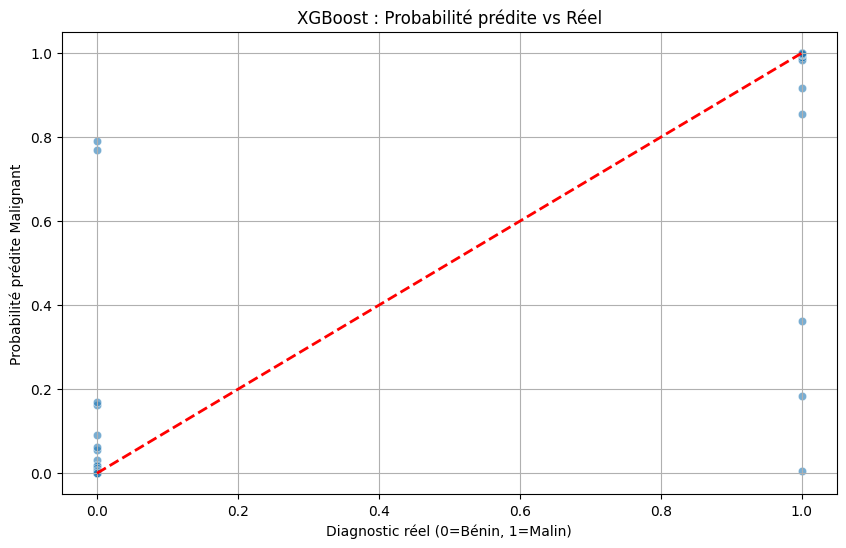

In [37]:
# Probabilités prédites pour la classe Malignant
y_pred_prob_xgb = fitted_models['XGBoost'].predict_proba(X_test)[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_prob_xgb, alpha=0.6)
plt.plot([0,1], [0,1], 'r--', lw=2)  # droite de référence
plt.xlabel("Diagnostic réel (0=Bénin, 1=Malin)")
plt.ylabel("Probabilité prédite Malignant")
plt.title("XGBoost : Probabilité prédite vs Réel")
plt.grid(True)
plt.show()


#Interprétation  :

Chaque point représente une tumeur du test.

L’axe x montre le diagnostic réel, et l’axe y la probabilité prédite par XGBoost d’être maligne.

Les points proches de 0 ou 1 indiquent une prédiction sûre, tandis que ceux autour de 0.5 montrent une incertitude.

La droite rouge représente la prédiction parfaite pour comparaison visuelle.

# Conclusion de l'Analyse du Dataset Breast Cancer

1. **Préparation des données :**
   - Les colonnes inutiles (`id`) ont été supprimées.
   - Les colonnes catégorielles (`diagnosis`) ont été encodées en numérique (`0 = Bénin`, `1 = Malin`) pour être utilisées comme target.
   - Toutes les autres colonnes sont numériques et ont été standardisées pour faciliter l'entraînement des modèles.

2. **Analyse exploratoire :**
   - Les histogrammes ont montré la distribution de chaque variable.
   - La heatmap des corrélations a permis de visualiser les relations entre les variables, et d’identifier celles fortement corrélées avec le diagnostic.
   - Les scatterplots ont aidé à comprendre les relations entre certaines variables clés et la target.

3. **Split Train/Test :**
   - Les données ont été séparées en 80% pour l’entraînement et 20% pour le test.
   - Le `random_state=42` garantit la reproductibilité des résultats.

4. **Modélisation :**
   - Trois modèles ont été entraînés : **Logistic Regression**, **Random Forest**, et **XGBoost**.
   - Chaque modèle a été évalué via la validation croisée (CV) pour mesurer la robustesse de ses performances.

5. **Évaluation :**
   - Les métriques principales utilisées sont **Accuracy, Precision, Recall et F1-score**.
   - La matrice de confusion a permis d’identifier les Vrais Positifs (TP), Vrais Négatifs (TN), Faux Positifs (FP) et Faux Négatifs (FN).
   - Le **Recall** est particulièrement important dans ce contexte médical afin de ne pas manquer de vrais cas de cancer (Faux Négatifs).

6. **Observations :**
   - Les modèles d’ensemble comme **Random Forest** et **XGBoost** donnent généralement de meilleurs résultats qu’une régression logistique simple.
   - Les variables fortement corrélées avec le diagnostic peuvent aider à interpréter quelles caractéristiques des tumeurs sont les plus discriminantes.

7. **Conclusion générale :**
   - Ce pipeline complet permet de **préparer, analyser, modéliser et évaluer** efficacement un dataset médical pour la classification binaire.
   - L’approche mise en place garantit une bonne généralisation grâce au split train/test et à la validation croisée.
   - Les visualisations et les métriques permettent de **prendre des décisions éclairées sur la fiabilité des modèles** et de comprendre leurs limites, en particulier le risque de Faux Négatifs dans le diagnostic du cancer.

